In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [17]:
def rmse(actual_values,predicted_values):
    squared_diff = [(actual - predicted) ** 2 for actual, predicted in zip(actual_values, predicted_values)]

    # Step 4: Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)

    # Step 5: Calculate RMSE (square root of the mean squared difference)
    rmse = np.sqrt(mean_squared_diff)
    return rmse

In [18]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [19]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (avg_error)
    
    return accuracy_percentage

In [20]:
model = PySRRegressor()

In [21]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114],T[0:114], s=5, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x[0:114],error(T,T_1)[0:114],s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('MAPE of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('RMSE of the model is: ',rmse(T,T_1))
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

----
# Without massive neutrinos
----

In [22]:
tf = pd.read_csv('TF_16_test.csv')
x = tf['x'].values
T = tf['T(k)'].values

In [23]:
a = 64
b = len(x)
alpha = int(b/a)

Unknown $\omega_m$ and unknown $\omega_b$

In [24]:
T_list = []
x_list = []
for i in range(a):
    T_list.append(T[i * alpha:(i + 1) * alpha])
    x_list.append(x[i * alpha:(i + 1) * alpha])

T_mat = np.empty((8, 8), dtype=object)
x_mat = np.empty((8, 8), dtype=object)

for i in range(8):
    for j in range(8):
        T_mat[i][j] = T_list[i * 8 + j]
        x_mat[i][j] = x_list[i * 8 + j]

T_mat_test = T_mat[4:8, 4:8]
x_mat_test = x_mat[4:8, 4:8]

T_vec_test = (np.concatenate(T_mat_test.reshape(-1)))
x_vec_test = (np.concatenate(x_mat_test.reshape(-1))).reshape(-1,1)

Checking if hall_of_fame_2023-10-08_162339.734.pkl exists...
Loading model from hall_of_fame_2023-10-08_162339.734.pkl
Model equation is:  \frac{0.236}{x^{1.08} + x^{1.74} + 0.233}
MAPE of the model is:  1.3 %
RMSE of the model is:  0.008660749831341333
Max percentage error is:  5.35 %


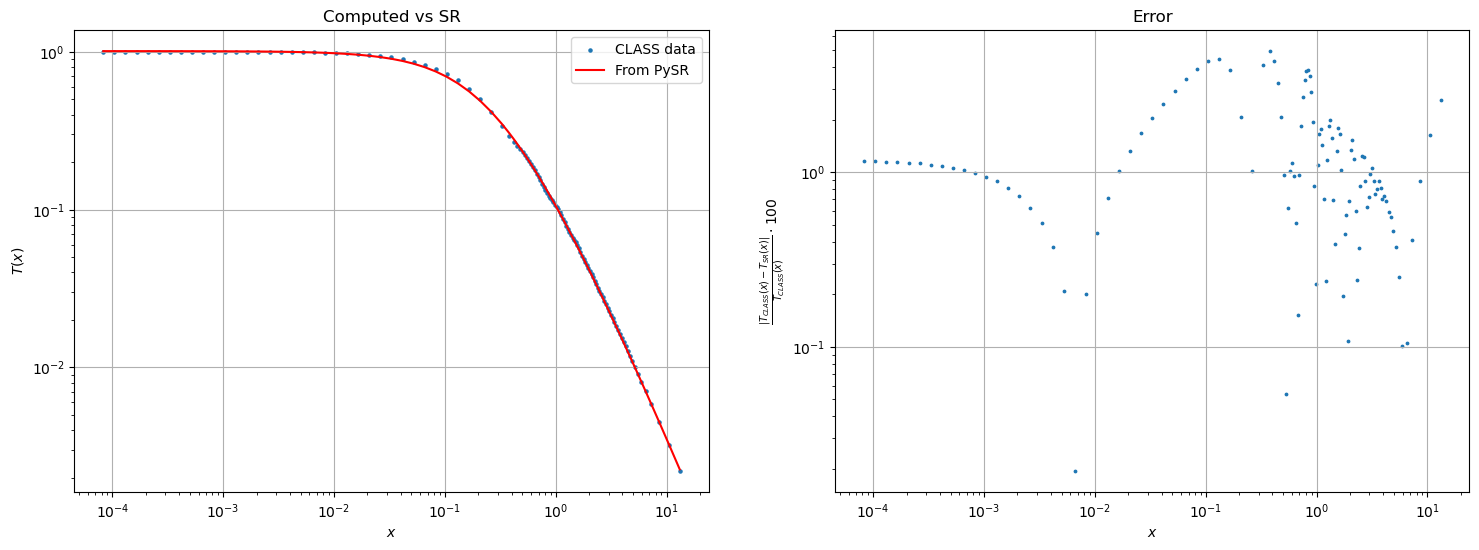

In [25]:
bran(x_vec_test,T_vec_test,'hall_of_fame_2023-10-08_162339.734.pkl')

----
# With one massive neutrino
----

In [26]:
tf2 = pd.read_csv('TF_64_test.csv')
x2 = tf2['x'].values
T2 = tf2['T(k)'].values

In [27]:
a2 = 512
b2 = len(x2)
alpha2 = int(b/a)

In [28]:
print(alpha2)

114


In [29]:
T_list = []
x_list = []
for i in range(a2):
    T_list.append(T2[i * alpha:(i + 1) * alpha])
    x_list.append(x2[i * alpha:(i + 1) * alpha])

T_tens = np.empty((8, 8, 8), dtype=object)
x_tens = np.empty((8, 8, 8), dtype=object)

for i in range(8):
    for j in range(8):
        for k in range(8):
            T_tens[i][j][k] = T_list[i * 64 + j * 8 + k]
            x_tens[i][j][k] = x_list[i * 64 + j * 8 + k]

T_tens_test = T_tens[4:8, 4:8]
x_tens_test = x_tens[4:8, 4:8]

T_vec_test = (np.concatenate(T_tens_test.reshape(-1)))
x_vec_test = (np.concatenate(x_tens_test.reshape(-1))).reshape(-1,1)

Checking if hall_of_fame_2023-10-02_095118.325.pkl exists...
Loading model from hall_of_fame_2023-10-02_095118.325.pkl
Model equation is:  \frac{0.470}{x \left(3.32 x^{0.276} + 0.793 x\right) + 0.470}
MAPE of the model is:  1.4 %
RMSE of the model is:  0.005036810492191916
Max percentage error is:  8.31 %


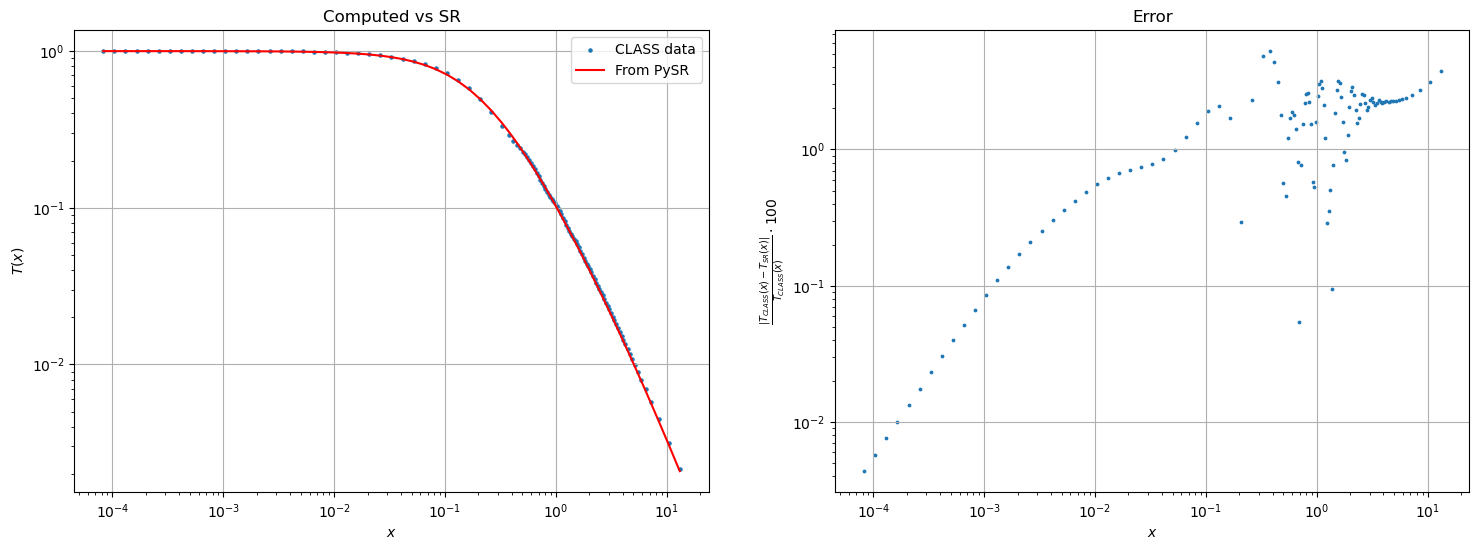

In [30]:
bran(x_vec_test,T_vec_test,'hall_of_fame_2023-10-02_095118.325.pkl')